In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Load and inspect the dataset

data = pd.read_csv('tesla_q1_2024.csv')

In [7]:
# Extract 'Total automotive revenues' row and transpose it
automotive_revenues = data[data.iloc[:, 0] == "Total automotive revenues"].transpose()
automotive_revenues.columns = ["Total_automotive_revenues"]
automotive_revenues = automotive_revenues.drop(automotive_revenues.index[0]).reset_index()
automotive_revenues.rename(columns={'index': 'Quarter'}, inplace=True)


In [8]:
# Clean revenue data and convert to numeric
automotive_revenues['Total_automotive_revenues'] = pd.to_numeric(automotive_revenues['Total_automotive_revenues'].str.replace(',', ''), errors='coerce')

# Filter out rows that don't match quarter format
automotive_revenues = automotive_revenues[automotive_revenues['Quarter'].str.match(r"Q[1-4]-\d{4}")]

# Extract year and quarter, convert to datetime, and create a lagged revenue feature
automotive_revenues['Year'] = automotive_revenues['Quarter'].str[-4:].astype(int)
automotive_revenues['Quarter_Number'] = automotive_revenues['Quarter'].str[1].astype(int)
automotive_revenues['Previous_Revenue'] = automotive_revenues['Total_automotive_revenues'].shift(1)
automotive_revenues.dropna(inplace=True)

# Define features and target
X = automotive_revenues[['Year', 'Quarter_Number', 'Previous_Revenue']]
y = automotive_revenues['Total_automotive_revenues']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Prepare the most recent data for prediction
latest_data = X.iloc[-1].copy()
latest_data['Previous_Revenue'] = y.iloc[-1]

# Increment the quarter and year for the next prediction
if latest_data['Quarter_Number'] == 4:
    latest_data['Quarter_Number'] = 1
    latest_data['Year'] += 1
else:
    latest_data['Quarter_Number'] += 1

# Predict next quarter's revenue
next_quarter_sales = model.predict(latest_data.values.reshape(1, -1))
print(f"Predicted Sales for Next Quarter: ${next_quarter_sales[0]:,.2f} million")

Predicted Sales for Next Quarter: $21,266.89 million


In [9]:
# Define features and target
X = automotive_revenues[['Year', 'Quarter_Number', 'Previous_Revenue']]
y = automotive_revenues['Total_automotive_revenues']


In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [11]:
# Prepare the most recent data for prediction
latest_data = X.iloc[-1].copy()
latest_data['Previous_Revenue'] = y.iloc[-1]

# Increment the quarter and year for the next prediction
if latest_data['Quarter_Number'] == 4:
    latest_data['Quarter_Number'] = 1
    latest_data['Year'] += 1
else:
    latest_data['Quarter_Number'] += 1

In [21]:
# Predict next quarter's revenue
next_quarter_sales = model.predict(latest_data.values.reshape(1, -1))
print(f"Predicted Sales for Next Quarter: ${next_quarter_sales[0]:,.2f} million")

# Create a DataFrame for the forecasted row
forecasted_row = pd.DataFrame({
    'Quarter': [f"Q{latest_data['Quarter_Number']}-{latest_data['Year']}"],
    'Total_automotive_revenues': [next_quarter_sales[0]]
})

# Concatenate the forecasted row to the existing data
forecasted_data = pd.concat([automotive_revenues, forecasted_row], ignore_index=True)



Predicted Sales for Next Quarter: $21,266.89 million


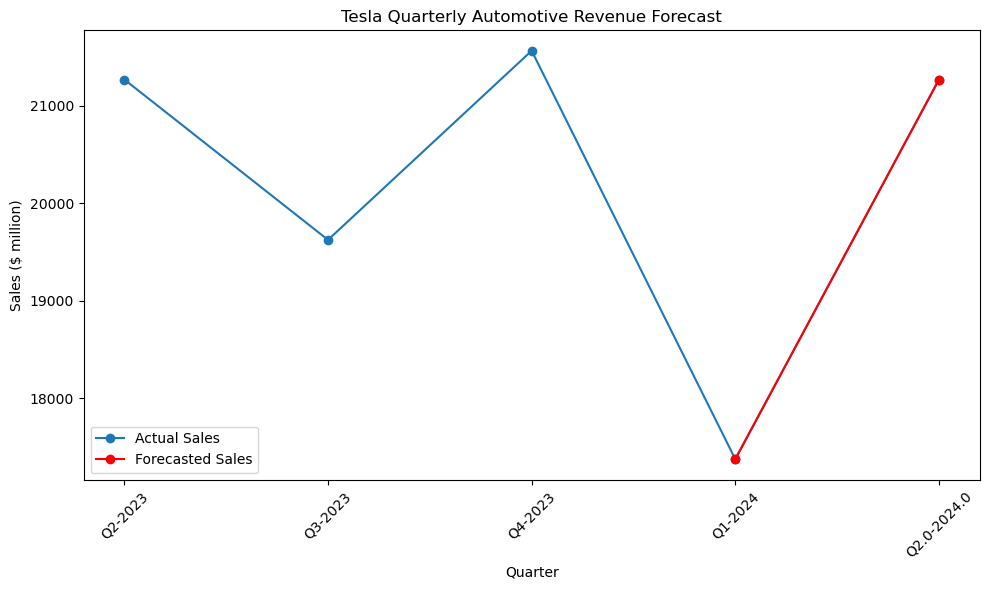

In [20]:
# Plot actual and forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(forecasted_data['Quarter'], forecasted_data['Total_automotive_revenues'], label='Actual Sales', marker='o')
plt.plot(forecasted_data['Quarter'].iloc[-2:], forecasted_data['Total_automotive_revenues'].iloc[-2:], label='Forecasted Sales', color='red', marker='o')
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("Sales ($ million)")
plt.title("Tesla Quarterly Automotive Revenue Forecast")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
#Train the model (Linear Regression in this case)
model = LinearRegression()
model.fit(X_train, y_train)

#  Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 2004.2330393487064


Root Mean Squared Error: 2004.2330393487064


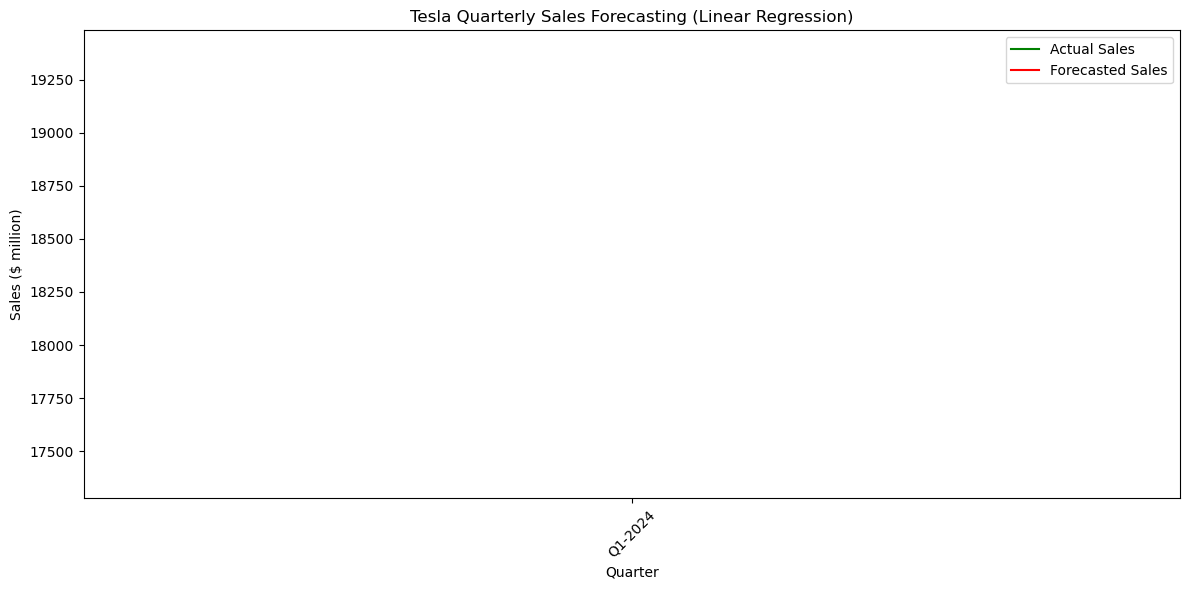

In [32]:


# Plot the predictions vs actual values using "Quarter" for the x-axis
plt.figure(figsize=(12, 6))
plt.plot(automotive_revenues['Quarter'].iloc[-len(y_test):], y_test, label="Actual Sales", color="green")
plt.plot(automotive_revenues['Quarter'].iloc[-len(y_test):], y_pred, label="Forecasted Sales", color="red")
plt.title("Tesla Quarterly Sales Forecasting (Linear Regression)")
plt.xlabel("Quarter")
plt.ylabel("Sales ($ million)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Date'